In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 110 kB 65.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 80.9 MB/s 
     |████████████████████████████████| 128 kB 65.4 MB/s 
     |████████████████████████████████| 4.0 MB 47.0 MB/s 


In [ ]:
!pip install --upgrade pandas-datareader
!pip install fix-yahoo-finance==0.1.30


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 27.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.30-py3-none-any.whl size=12153 sha256=df018c1a7197f116b98ae237aa51c9f3dd9f246ae04fd3f93ba05ce2abe34385
  Stored in directory: /root/.cache/pip/wheels/25/59/0d/122e739832e8280d2fa30bdde39e91ac2dd773fe1897af9a32
Successfully built fix-yahoo-finance
  Attempting uninstall: fix-yahoo-finance
    Found existing installation: fix-yahoo-finance 0.0.22
    Uninstalling fix-yahoo-finance-0.0.22:
      Successfully uninstalled fix-yahoo-finance-0.0.22


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

import yfinance as yf

# For time stamps
from datetime import datetime

#importing warnings to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) #taking 1 year of data range from 2021 to 2022

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
    
df = pd.concat(company_list, axis = 0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626511,92135300,APPLE
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262817,68356600,APPLE
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,APPLE
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300,APPLE
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,APPLE
...,...,...,...,...,...,...,...
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000,AMAZON
2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500,AMAZON
2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300,AMAZON


In [ ]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [ ]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2017-12-14,43.099998,43.282501,42.912498,43.055000,40.940990,81906000,APPLE
2017-12-15,43.407501,43.542500,43.115002,43.492500,41.357010,160677200,APPLE
2017-12-18,43.720001,44.299999,43.715000,44.105000,41.939438,117684400,APPLE
2017-12-19,43.757500,43.847500,43.522499,43.634998,41.492508,109745600,APPLE
2017-12-20,43.717499,43.855000,43.312500,43.587502,41.447342,93902400,APPLE
...,...,...,...,...,...,...,...
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900,AMAZON
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900,AMAZON
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67316900,AMAZON


In [ ]:
df.to_csv("dataset.csv")

In [ ]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,128.376449,130.477303,125.970338,128.135719,128.135719,7.550775e+07
std,24.081207,24.149865,23.973831,24.081217,24.081217,3.420477e+07
min,85.330002,85.680000,82.250000,82.614998,82.614998,3.508860e+07
25%,110.389999,113.230003,107.453499,110.400002,110.400002,5.428030e+07
50%,124.053497,125.610001,121.349998,124.629997,124.629997,6.615400e+07
75%,150.018494,152.982498,147.353500,150.197495,150.197495,8.501110e+07
max,171.037003,172.942993,170.149994,171.068497,171.068497,2.726620e+08


In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-12-22 to 2022-12-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


**Historical View of closing price**

In [ ]:
Closing_plot = px.area(df, facet_col = 'company_name', x = df.index, y = 'Adj Close', facet_col_wrap = 4, color = 'company_name', template= 'plotly_dark')


In [ ]:
Closing_plot.show()

**Sales volume per stock**

In [ ]:
Volume_plot = px.area(df, facet_col = 'company_name', x = df.index, y = 'Volume', facet_col_wrap = 4, color = 'company_name', template = 'plotly_dark')
Volume_plot.show()

**Daily return**

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()
fig = px.line(df, facet_col = 'company_name', x = df.index, y = 'Daily Return', facet_col_wrap = 12, color = 'company_name', template = 'plotly_dark')
fig.show()




In [ ]:
Daily_return = px.histogram(df, x = 'company_name', y = 'Daily Return', color = 'company_name', template = 'plotly_dark')
Daily_return.show()

**Correlations between stocks**

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df = yf.download(tech_list, start= '2021-01-01',end= datetime.now())['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
# Make a new tech returns DataFrame
tech_rtn = closing_df.pct_change()
tech_rtn.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.007337,0.000965
2021-01-06,-0.033662,-0.024897,-0.003234,-0.025929
2021-01-07,0.034123,0.007577,0.029943,0.028457
2021-01-08,0.008631,0.006496,0.011168,0.006093


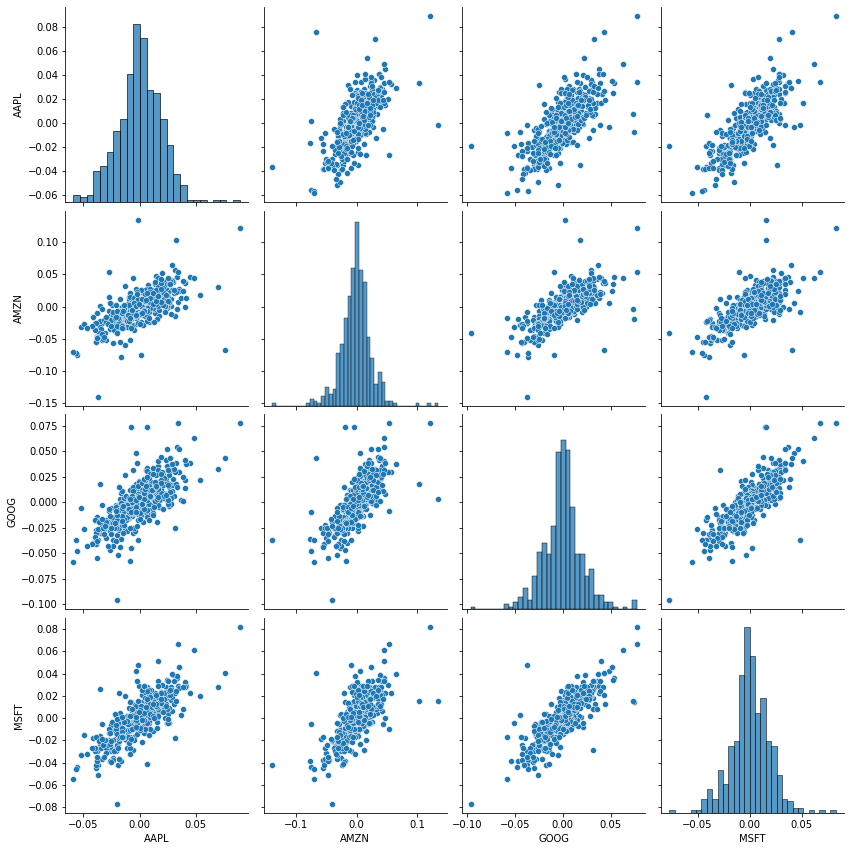

In [ ]:
sns.pairplot(tech_rtn, size=3)

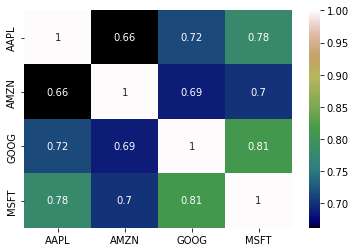

In [ ]:
sns.heatmap(tech_rtn.corr(), annot = True, cmap = 'gist_earth')

From the heatmap it is concluded that Microsoft and google have the strong correlation for the returns. It's also interesting to see that all the technology comapnies are positively correlated.

**Predicting Microsoft closing price**

In [ ]:
# Get the stock quote
df_predict = yf.download('MSFT', start= '2007-12-01',end= '2009-07-01')

# Show the data
df_predict


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-03,33.500000,33.639999,32.680000,32.919998,24.167332,61770600
2007-12-04,32.740002,33.240002,32.630001,32.770000,24.057213,54801500
2007-12-05,33.139999,34.520000,33.029999,34.150002,25.070299,84894700
2007-12-06,34.259998,34.610001,33.869999,34.549999,25.363949,49209700
2007-12-07,34.610001,34.700001,34.220001,34.529999,25.349266,40771000
...,...,...,...,...,...,...
2009-06-24,23.450001,23.750000,23.360001,23.469999,17.780329,54287700
2009-06-25,23.430000,23.920000,23.200001,23.790001,18.022755,57724300
2009-06-26,23.570000,23.690001,23.320000,23.350000,17.689426,65126400


In [ ]:
fig = px.area(df_predict, y = 'Close', facet_col_wrap = 12, template = 'plotly_dark', title= 'Close Price History')
fig.show()

In [ ]:
# Create a new dataframe with only the 'Close' column 
data = df_predict.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

378

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(397, 1)

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
            
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #adding the batch size axis
x_train.shape


(318, 60, 1)

In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
hist = model.fit(x_train, y_train, batch_size=35, epochs=20, verbose=2)

Epoch 1/20
10/10 - 10s - loss: 0.0503 - 10s/epoch - 1s/step
Epoch 2/20
10/10 - 0s - loss: 0.0135 - 155ms/epoch - 16ms/step
Epoch 3/20
10/10 - 0s - loss: 0.0095 - 143ms/epoch - 14ms/step
Epoch 4/20
10/10 - 0s - loss: 0.0062 - 139ms/epoch - 14ms/step
Epoch 5/20
10/10 - 0s - loss: 0.0054 - 130ms/epoch - 13ms/step
Epoch 6/20
10/10 - 0s - loss: 0.0052 - 128ms/epoch - 13ms/step
Epoch 7/20
10/10 - 0s - loss: 0.0054 - 129ms/epoch - 13ms/step
Epoch 8/20
10/10 - 0s - loss: 0.0052 - 139ms/epoch - 14ms/step
Epoch 9/20
10/10 - 0s - loss: 0.0051 - 128ms/epoch - 13ms/step
Epoch 10/20
10/10 - 0s - loss: 0.0047 - 135ms/epoch - 14ms/step
Epoch 11/20
10/10 - 0s - loss: 0.0047 - 151ms/epoch - 15ms/step
Epoch 12/20
10/10 - 0s - loss: 0.0064 - 131ms/epoch - 13ms/step
Epoch 13/20
10/10 - 0s - loss: 0.0058 - 129ms/epoch - 13ms/step
Epoch 14/20
10/10 - 0s - loss: 0.0059 - 136ms/epoch - 14ms/step
Epoch 15/20
10/10 - 0s - loss: 0.0058 - 127ms/epoch - 13ms/step
Epoch 16/20
10/10 - 0s - loss: 0.0047 - 128ms/epoch 

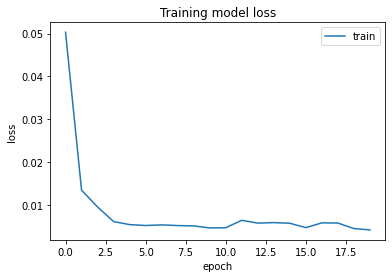

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc ='upper right')
plt.show()

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


2.1494218557162994

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 20ms/step


In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

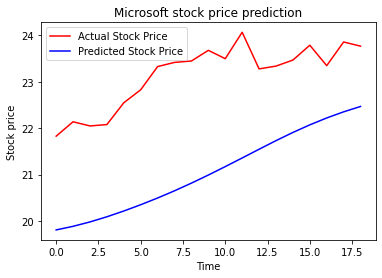

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Microsoft stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

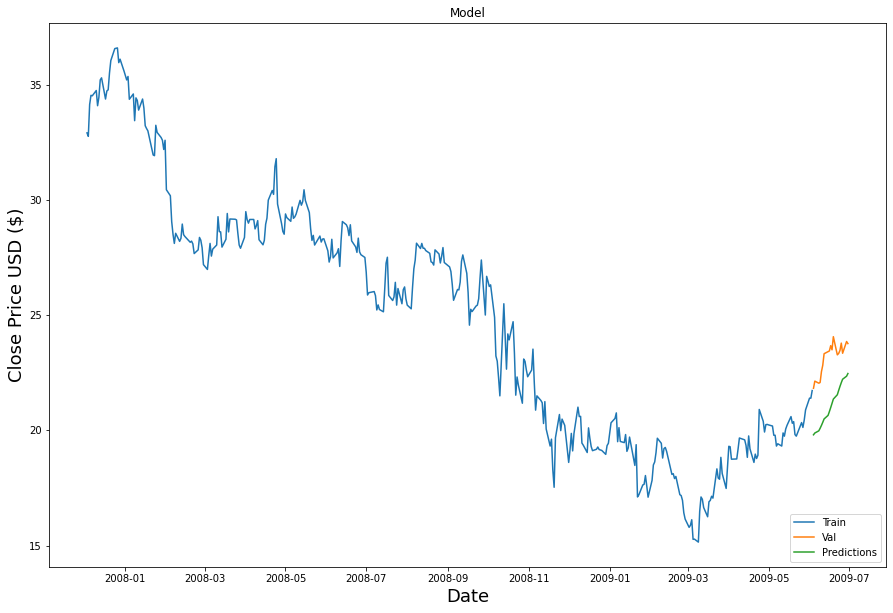

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2009-06-04,21.830000,19.808754
2009-06-05,22.139999,19.886179
2009-06-08,22.049999,19.980988
2009-06-09,22.080000,20.091974
2009-06-10,22.549999,20.216242
2009-06-11,22.830000,20.351648
2009-06-12,23.330000,20.496864
2009-06-15,23.420000,20.652161
2009-06-16,23.450001,20.817575


In [ ]:
# Get the stock quote
df_all = yf.download('MSFT', start= '2007-01-01',end= datetime.now())

# Show the data
df_all

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,29.910000,30.250000,29.400000,29.860001,21.627077,76935100
2007-01-04,29.700001,29.969999,29.440001,29.809999,21.590864,45774500
2007-01-05,29.629999,29.750000,29.450001,29.639999,21.467731,44607200
2007-01-08,29.650000,30.100000,29.530001,29.930000,21.677773,50220200
2007-01-09,30.000000,30.180000,29.730000,29.959999,21.699501,44636600
...,...,...,...,...,...,...
2022-12-16,248.550003,249.839996,243.509995,244.690002,244.690002,86088100
2022-12-19,244.860001,245.210007,238.710007,240.449997,240.449997,29696400
2022-12-20,239.399994,242.910004,238.419998,241.800003,241.800003,25150800


In [ ]:
fig = px.area(df_predict, y = 'Close', facet_col_wrap = 12, template = 'plotly_dark', title= 'Close Price History')
fig.show()

In [ ]:
# Create a new dataframe with only the 'Close' column 
data = df_all.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3822

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(4023, 1)

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
            
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #adding the batch size axis
x_train.shape

(3762, 60, 1)

In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
hist = model.fit(x_train, y_train, batch_size=35, epochs=20, verbose=2)

Epoch 1/20
108/108 - 7s - loss: 0.0030 - 7s/epoch - 64ms/step
Epoch 2/20
108/108 - 1s - loss: 0.0013 - 1s/epoch - 13ms/step
Epoch 3/20
108/108 - 1s - loss: 9.7344e-04 - 1s/epoch - 13ms/step
Epoch 4/20
108/108 - 1s - loss: 9.4124e-04 - 1s/epoch - 13ms/step
Epoch 5/20
108/108 - 1s - loss: 7.4805e-04 - 1s/epoch - 13ms/step
Epoch 6/20
108/108 - 1s - loss: 7.2231e-04 - 1s/epoch - 13ms/step
Epoch 7/20
108/108 - 1s - loss: 7.5375e-04 - 1s/epoch - 13ms/step
Epoch 8/20
108/108 - 1s - loss: 6.6859e-04 - 1s/epoch - 13ms/step
Epoch 9/20
108/108 - 1s - loss: 8.0315e-04 - 1s/epoch - 13ms/step
Epoch 10/20
108/108 - 1s - loss: 6.4972e-04 - 1s/epoch - 13ms/step
Epoch 11/20
108/108 - 1s - loss: 6.5442e-04 - 1s/epoch - 13ms/step
Epoch 12/20
108/108 - 1s - loss: 6.2781e-04 - 1s/epoch - 13ms/step
Epoch 13/20
108/108 - 1s - loss: 6.9061e-04 - 1s/epoch - 13ms/step
Epoch 14/20
108/108 - 1s - loss: 5.2781e-04 - 1s/epoch - 13ms/step
Epoch 15/20
108/108 - 1s - loss: 6.2289e-04 - 1s/epoch - 13ms/step
Epoch 16/20


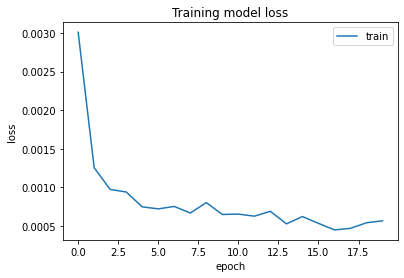

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc ='upper right')
plt.show()

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 [==============================] - 1s 9ms/step


14.989934386381236

In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 9ms/step


In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 10ms/step


In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

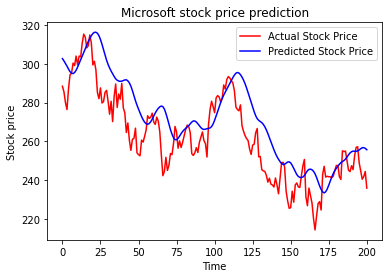

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Microsoft stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

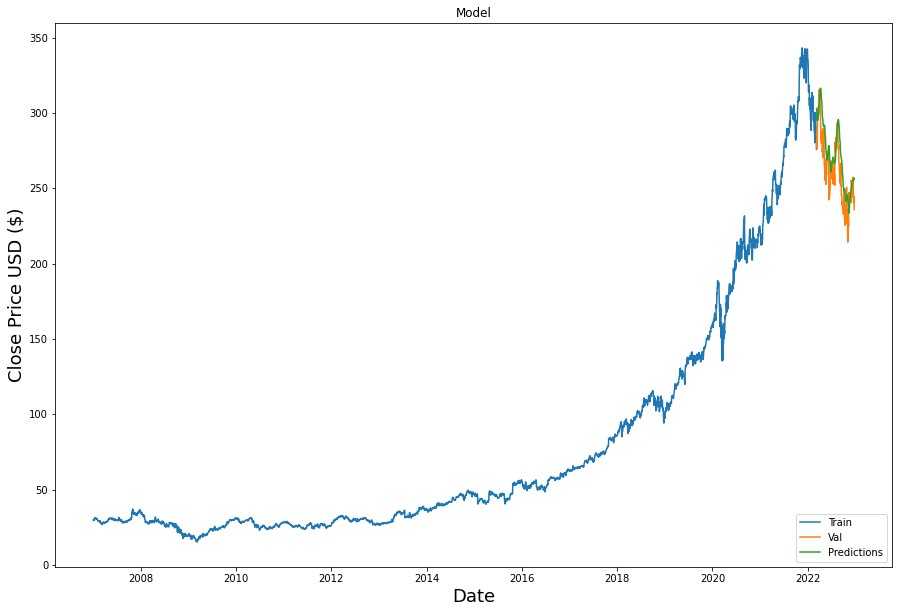

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-03-09,288.500000,302.746124
2022-03-10,285.589996,301.575897
2022-03-11,280.070007,300.255371
2022-03-14,276.440002,298.858337
2022-03-15,287.149994,297.361572
...,...,...
2022-12-16,244.690002,256.209656
2022-12-19,240.449997,256.697540
2022-12-20,241.800003,256.770203
